<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!wget "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py" -O "common.py"
from common import *

--2020-01-27 16:32:56--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4100 (4.0K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   4.00K  --.-KB/s    in 0s      

2020-01-27 16:32:56 (72.9 MB/s) - ‘common.py’ saved [4100/4100]



In [4]:
!wget "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/extraction.py" -O "extraction.py"
from extraction import *

--2020-01-27 16:33:00--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/extraction.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241 [text/plain]
Saving to: ‘extraction.py’

extraction.py       100%[===================>]     241  --.-KB/s    in 0s      

2020-01-27 16:33:00 (52.0 MB/s) - ‘extraction.py’ saved [241/241]



In [5]:
!cp "./drive/My Drive/sudoku_transformation_output.bz2" "./sudoku_transformation_output.bz2"
dataset = pd.read_pickle("./sudoku_transformation_output.bz2")
dataset

,transform_contour_source,transform_contour_target,transform_matrix,transform_image
input_filename,,,,
./v2_train/image1066.jpg,"[[68, 279], [58, 754], [938, 755], [910, 277]]","[[0, 0], [0, 668], [668, 668], [668, 0]]","[[0.8204339094756261, 0.017272292831065825, -6...","[[[81, 77, 76], [56, 51, 51], [51, 47, 46], [5..."
./v2_train/image1087.jpg,"[[113, 157], [103, 750], [951, 736], [892, 158]]","[[0, 0], [0, 700], [700, 700], [700, 0]]","[[0.8959081900871946, 0.015108063913780664, -1...","[[[115, 116, 111], [92, 92, 88], [96, 95, 91],..."
./v2_train/image204.jpg,"[[195, 143], [190, 948], [816, 954], [799, 130]]","[[0, 0], [0, 714], [714, 714], [714, 0]]","[[1.2271860186702523, 0.007622273407889741, -2...","[[[86, 81, 50], [83, 78, 48], [84, 79, 50], [8..."
./v2_train/image1075.jpg,"[[116, 234], [111, 854], [959, 837], [914, 224]]","[[0, 0], [0, 720], [720, 720], [720, 0]]","[[0.9142699767360596, 0.0073731449736779125, -...","[[[130, 129, 126], [89, 86, 83], [79, 72, 69],..."
./v2_train/image1020.jpg,"[[104, 220], [85, 947], [982, 935], [990, 203]]","[[0, 0], [0, 810], [810, 810], [810, 0]]","[[0.9254990733211648, 0.02418773369064942, -10...","[[[127, 132, 130], [129, 133, 132], [131, 135,..."
...,...,...,...,...
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165336189.jpg,"[[202, 362], [20, 754], [989, 744], [776, 350]]","[[0, 0], [0, 605], [605, 605], [605, 0]]","[[3.091255580079939, 1.435225805037115, -1143....","[[[109, 103, 87], [60, 54, 38], [60, 54, 38], ..."
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg,"[[233, 327], [188, 746], [821, 741], [773, 320]]","[[0, 0], [0, 504], [504, 504], [504, 0]]","[[1.092045368579517, 0.11728410879732293, -292...","[[[85, 80, 84], [28, 23, 27], [41, 36, 40], [3..."
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165358878.jpg,"[[228, 366], [59, 725], [988, 723], [775, 358]]","[[0, 0], [0, 573], [573, 573], [573, 0]]","[[3.9051684648137672, 1.8383662132410217, -156...","[[[52, 50, 55], [45, 43, 48], [46, 44, 49], [5..."


# Introduction

After having corrected the input image's perspective, the extraction of cells themself is rather easy under a few assumptions:

*   Each Sudoku grid consists of exactly 9 rows and 9 columns.
*   Each Soduku grid is made up of equally sized squares.


![Extraction Visualization](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/documentation/extraction.png?raw=true)

# Extraction of individual cells

Under these assumptions we do not have to detect any sort of lines, but instead we can simply devide the image into a 9-by-9 grid of squares.
Each square should then contain exactly one Sudoku cell.
This division is implemented by the method [`extract_cells(...)`](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/extraction.py) which accepts an corrected image and returns a list of 9 rows each containing 9 columns corresponding to the cells of the Sudoku puzzle.

In [0]:
cells = [extract_cells(x) for x in dataset["transform_image"]]

The variable `cells` now contains all extracted cell images. The element `cells[i][j][k]` contains the image of the cell in the `i`-th image located in the `j`-th row and the `k`-th column.
Using the method [`show_cells(...)`](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py) we can visualize the extracted cell images of a puzzle.

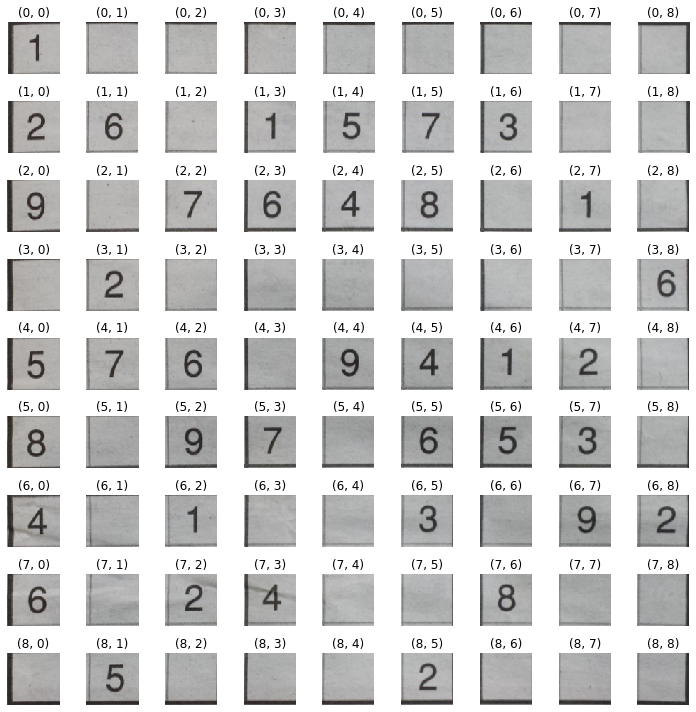

In [9]:
show_cells(cells[0])

# Export

The image of each individual cell is then exported.
Each cell is indexed by the input image filename it is contained in and its respective row and column indices.

In [0]:
df_input_filename = []
df_cell_row = []
df_cell_col = []
df_cell_image = []

for i_image in range(len(dataset)):
  for i_row in range(9):
    for i_col in range(9):
      df_input_filename.append(dataset.index[i_image])
      df_cell_row.append(i_row)
      df_cell_col.append(i_col)
      df_cell_image.append(cells[i_image][i_row][i_col])

In [0]:
df = pd.DataFrame({
    "input_filename": df_input_filename,
    "cell_row": df_cell_row,
    "cell_col": df_cell_col,
    "cell_image": df_cell_image,
}).set_index(["input_filename", "cell_row", "cell_col"])

In [12]:
df

cell_image
input_filename                                     cell_row cell_col                                                   
./v2_train/image1066.jpg                           0        0         [[[81, 77, 76], [56, 51, 51], [51, 47, 46], [5...
                                                            1         [[[49, 45, 43], [50, 46, 44], [53, 49, 47], [5...
                                                            2         [[[55, 49, 50], [56, 50, 51], [57, 53, 51], [5...
                                                            3         [[[50, 47, 46], [50, 46, 45], [51, 47, 46], [5...
                                                            4         [[[55, 50, 52], [57, 51, 54], [58, 52, 55], [5...
...                                                                                                                 ...
./sudoku_dataset_1024/train_247994761_full/IMG_... 8        4         [[[173, 167, 174], [173, 168, 174], [173, 168,...
                                                            5         [[[179, 174, 180], [175, 170, 176], [174, 169,...
                                                            6         [[[161, 156, 162], [165, 160, 166], [170, 165,...
                                                            7         [[[178, 173, 179], [177, 172, 178], [174, 169,...
                                                            8         [[[154, 152, 157], [115, 113, 118], [142, 140,...

[17658 rows x 1 columns]

In [0]:
df.to_pickle("./sudoku_extraction_output.bz2")

In [0]:
!cp "./sudoku_extraction_output.bz2" "./drive/My Drive/sudoku_extraction_output.bz2"